# <center> Pandas (part 01) <center> 

<img src = 'https://github.com/saeed-saffari/alzahra-workshop-spr2021/blob/main/lecture/PIC/Pandas.png?raw=true' 
     width = "350"
     >

In the previous sessions, we dove into detail on NumPy and its ``ndarray`` object and matplotlib, which provides efficient storage and manipulation of dense typed arrays and Visualization in Python.
Here we'll build on this knowledge by looking in detail at the data structures provided by the Pandas library.
Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a ``DataFrame``.
``DataFrame``s are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.
As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs.

As we saw, NumPy's ``ndarray`` data structure provides essential features for the type of clean, well-organized data typically seen in numerical computing tasks.
While it serves this purpose very well, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (e.g., groupings, pivots, etc.), each of which is an important piece of analyzing the less structured data available in many forms in the world around us.
Pandas, and in particular its ``Series`` and ``DataFrame`` objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

To get started with pandas, you will need to get comfortable with its two workhorse data structures: Series and DataFrame. While they are not a universal solution for every problem, they provide a solid, easy-to-use basis for most applications.

In this session, we will focus on the mechanics of using ``Series``, ``DataFrame``, and related structures effectively.


##  Installation

- Conda install pandas
- pip install pandas
- pip install --upgrade pandas

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data.
It can be created from a list or array.

- ``Series`` as generalized NumPy array <br><br>
From what we've seen so far, it may look like the ``Series`` object is basically interchangeable with a one-dimensional NumPy array.
The essential difference is the presence of the index: while the Numpy Array has an *implicitly defined* integer index used to access the values, the Pandas ``Series`` has an *explicitly defined* index associated with the values.<br><br>
This explicit index definition gives the ``Series`` object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type.
For example, if we wish, we can use strings as an index.


- ``Series`` as specialized dictionary <br><br>
In this way, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.<br>
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.<br><br>
The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [2]:
indecec = ['a', 'b', 'c']
my_list = [20,30,41]

dictionary_list = {'a':20, 'b':30, 'c':41}

In [3]:
pd.Series(data= my_list)

0    20
1    30
2    41
dtype: int64

In [5]:
x = pd.Series(data= my_list, index=indecec)
print(x)

a    20
b    30
c    41
dtype: int64


In [6]:
x['b']

np.int64(30)

In [7]:
pd.Series(data = dictionary_list)

a    20
b    30
c    41
dtype: int64

### 1.1 Sum Series

In [8]:
ser1 = pd.Series(data=[10,25,20,15], index=['IRN', 'USA', 'BRZ', 'JAP'])
ser2 = pd.Series(data=[30,40,34,45], index=['IRN', 'USA', 'GER', 'JAP'])

In [10]:
ser1

IRN    10
USA    25
BRZ    20
JAP    15
dtype: int64

In [11]:
ser2

IRN    30
USA    40
GER    34
JAP    45
dtype: int64

In [12]:
ser1 + ser2

BRZ     NaN
GER     NaN
IRN    40.0
JAP    60.0
USA    65.0
dtype: float64

## 2. The Pandas DataFrame Object

The next fundamental structure in Pandas is the ``DataFrame``.
Like the ``Series`` object discussed in the previous section, the ``DataFrame`` can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.
We'll now take a look at each of these perspectives.

If a Series is an analog of a one-dimensional array with flexible indices, a DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names. Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a sequence of aligned Series objects. Here, by "aligned" we mean that they share the same index.

In [23]:
df = pd.DataFrame(data=np.random.randint(0,100,(5,4)), 
                 index=['A', 'B', 'C', 'D', 'E'],
                 columns=['W','X','Y','Z'])
df

,W,X,Y,Z
A,72,2,5,26
B,39,32,67,43
C,11,56,95,7
D,70,75,73,97
E,41,5,61,31


### 2.1 Columns, index, shape

Like the ``Series`` object, the ``DataFrame`` has an ``index`` attribute that gives access to the index labels:

In [24]:
df.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

Additionally, the ``DataFrame`` has a ``columns`` attribute, which is an ``columns`` object holding the column labels:

In [25]:
df.columns

Index(['W', 'X', 'Y', 'Z'], dtype='object')

After all, the ``DataFrame`` has a ``shape`` attribute, which is tell us number of columns and index in out DataFrame:

In [26]:
df.shape

(5, 4)

Thus the ``DataFrame`` can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

### 2.2 Call in table

The individual ``Series`` that make up the columns of the ``DataFrame`` can be accessed via dictionary-style indexing of the column name:

In [28]:
df

,W,X,Y,Z
A,72,2,5,26
B,39,32,67,43
C,11,56,95,7
D,70,75,73,97
E,41,5,61,31


In [27]:
df['W']

A    72
B    39
C    11
D    70
E    41
Name: W, dtype: int64

In [29]:
df[['W', 'Y']]

,W,Y
A,72,5
B,39,67
C,11,95
D,70,73
E,41,61


Equivalently, we can use attribute-style access with column names that are strings:

In [30]:
df['Z']

A    26
B    43
C     7
D    97
E    31
Name: Z, dtype: int64

In [32]:
df.Z

A    26
B    43
C     7
D    97
E    31
Name: Z, dtype: int64

### 2.3 Create new column

You may add a new column to an existing pandas ``DataFrames`` just by assigning values to a new column name.

In [33]:
df['NEW'] = df['X'] + df['Y']
df

,W,X,Y,Z,NEW
A,72,2,5,26,7
B,39,32,67,43,99
C,11,56,95,7,151
D,70,75,73,97,148
E,41,5,61,31,66


In [36]:
df['Percentage'] = (df['X'] / df['NEW'] * 100).round(2)
df

,W,X,Y,Z,NEW,Percentage
A,72,2,5,26,7,28.57
B,39,32,67,43,99,32.32
C,11,56,95,7,151,37.09
D,70,75,73,97,148,50.68
E,41,5,61,31,66,7.58


### 2.4 Drop row and column

In [37]:
df

,W,X,Y,Z,NEW,Percentage
A,72,2,5,26,7,28.57
B,39,32,67,43,99,32.32
C,11,56,95,7,151,37.09
D,70,75,73,97,148,50.68
E,41,5,61,31,66,7.58


In [38]:
df.drop('B', axis=0)

,W,X,Y,Z,NEW,Percentage
A,72,2,5,26,7,28.57
C,11,56,95,7,151,37.09
D,70,75,73,97,148,50.68
E,41,5,61,31,66,7.58


In [39]:
df.drop('NEW', axis=1)

,W,X,Y,Z,Percentage
A,72,2,5,26,28.57
B,39,32,67,43,32.32
C,11,56,95,7,37.09
D,70,75,73,97,50.68
E,41,5,61,31,7.58


In [40]:
df

,W,X,Y,Z,NEW,Percentage
A,72,2,5,26,7,28.57
B,39,32,67,43,99,32.32
C,11,56,95,7,151,37.09
D,70,75,73,97,148,50.68
E,41,5,61,31,66,7.58


In [41]:
df.drop('B', axis=0, inplace=True)
df

,W,X,Y,Z,NEW,Percentage
A,72,2,5,26,7,28.57
C,11,56,95,7,151,37.09
D,70,75,73,97,148,50.68
E,41,5,61,31,66,7.58


In [42]:
df

,W,X,Y,Z,NEW,Percentage
A,72,2,5,26,7,28.57
C,11,56,95,7,151,37.09
D,70,75,73,97,148,50.68
E,41,5,61,31,66,7.58


In [43]:
df = df.drop('NEW', axis=1)
df

,W,X,Y,Z,Percentage
A,72,2,5,26,28.57
C,11,56,95,7,37.09
D,70,75,73,97,50.68
E,41,5,61,31,7.58


In [44]:
df

,W,X,Y,Z,Percentage
A,72,2,5,26,28.57
C,11,56,95,7,37.09
D,70,75,73,97,50.68
E,41,5,61,31,7.58


### 2.5 Rename

In [45]:
df

,W,X,Y,Z,Percentage
A,72,2,5,26,28.57
C,11,56,95,7,37.09
D,70,75,73,97,50.68
E,41,5,61,31,7.58


In [46]:
df.rename(columns={'W':'Ali'})

,Ali,X,Y,Z,Percentage
A,72,2,5,26,28.57
C,11,56,95,7,37.09
D,70,75,73,97,50.68
E,41,5,61,31,7.58


In [49]:
df.rename(columns={'W':'Ali', 'Z':'Sanaz'}, inplace=True)
df

,Ali,X,Y,Sanaz,Percentage
A,72,2,5,26,28.57
C,11,56,95,7,37.09
D,70,75,73,97,50.68
E,41,5,61,31,7.58


In [50]:
df

,Ali,X,Y,Sanaz,Percentage
A,72,2,5,26,28.57
C,11,56,95,7,37.09
D,70,75,73,97,50.68
E,41,5,61,31,7.58


In [53]:
df = df.rename({'A':'Javad', 'D':'Shabnam'})
df

,Ali,X,Y,Sanaz,Percentage
Javad,72,2,5,26,28.57
C,11,56,95,7,37.09
Shabnam,70,75,73,97,50.68
E,41,5,61,31,7.58


In [54]:
df

,Ali,X,Y,Sanaz,Percentage
Javad,72,2,5,26,28.57
C,11,56,95,7,37.09
Shabnam,70,75,73,97,50.68
E,41,5,61,31,7.58


### 2.6 Sort Value and index

Sorting a dataset by some criterion is another important built-in operation. To sort lexicographically by row or column index, use the ``sort_index`` method, which returns a new, sorted object:

In [55]:
df

,Ali,X,Y,Sanaz,Percentage
Javad,72,2,5,26,28.57
C,11,56,95,7,37.09
Shabnam,70,75,73,97,50.68
E,41,5,61,31,7.58


With a DataFrame, you can sort by index on either axis:

In [56]:
df.sort_index()

,Ali,X,Y,Sanaz,Percentage
C,11,56,95,7,37.09
E,41,5,61,31,7.58
Javad,72,2,5,26,28.57
Shabnam,70,75,73,97,50.68


In [58]:
df.sort_index(axis = 1)

,Ali,Percentage,Sanaz,X,Y
Javad,72,28.57,26,2,5
C,11,37.09,7,56,95
Shabnam,70,50.68,97,75,73
E,41,7.58,31,5,61


The data is sorted in ascending order by default, but can be sorted in descending order, too:

In [59]:
df.sort_index(ascending=False)

,Ali,X,Y,Sanaz,Percentage
Shabnam,70,75,73,97,50.68
Javad,72,2,5,26,28.57
E,41,5,61,31,7.58
C,11,56,95,7,37.09


To sort a Series by its values, use its ``sort_values`` method:

In [69]:
df_sort = df.sort_values(by='Sanaz', ascending=False)
df_sort

,Ali,X,Y,Sanaz,Percentage
Shabnam,70,75,73,97,50.68
E,41,5,61,31,7.58
Javad,72,2,5,26,28.57
C,11,56,95,7,37.09


To sort by multiple columns, pass a list of names:

In [70]:
df_sort.loc['Javad', 'Sanaz'] = 31

In [71]:
df_sort.sort_values(by=['Sanaz', 'Y'])

,Ali,X,Y,Sanaz,Percentage
C,11,56,95,7,37.09
Javad,72,2,5,31,28.57
E,41,5,61,31,7.58
Shabnam,70,75,73,97,50.68


### 2.7 call in table

For ``DataFrame`` label-indexing on the rows, I introduce the special indexing operators ``loc`` and ``iloc``. They enable you to select a subset of the rows and columns from a DataFrame with NumPy-like notation using either axis labels (``loc``) or integers (``iloc``).

In [72]:
df

,Ali,X,Y,Sanaz,Percentage
Javad,72,2,5,26,28.57
C,11,56,95,7,37.09
Shabnam,70,75,73,97,50.68
E,41,5,61,31,7.58


#### iloc

In [73]:
df.iloc[0:3]

,Ali,X,Y,Sanaz,Percentage
Javad,72,2,5,26,28.57
C,11,56,95,7,37.09
Shabnam,70,75,73,97,50.68


In [74]:
df.iloc[0:3, 2:-1]

,Y,Sanaz
Javad,5,26
C,95,7
Shabnam,73,97


In [76]:
df.iloc[0:3, [0,3]]

,Ali,Sanaz
Javad,72,26
C,11,7
Shabnam,70,97


In [77]:
df.iloc[:, 2:4]

,Y,Sanaz
Javad,5,26
C,95,7
Shabnam,73,97
E,61,31


#### loc

Similarly, using the ``loc`` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

In [78]:
df

,Ali,X,Y,Sanaz,Percentage
Javad,72,2,5,26,28.57
C,11,56,95,7,37.09
Shabnam,70,75,73,97,50.68
E,41,5,61,31,7.58


In [79]:
df.loc['Javad']

Ali           72.00
X              2.00
Y              5.00
Sanaz         26.00
Percentage    28.57
Name: Javad, dtype: float64

In [81]:
df.loc[['Javad','Shabnam']]

,Ali,X,Y,Sanaz,Percentage
Javad,72,2,5,26,28.57
Shabnam,70,75,73,97,50.68


In [85]:
df.loc['Javad', 'Y']

np.int64(5)

In [87]:
df.loc[['Javad','Shabnam'], ['X','Sanaz']]

,X,Sanaz
Javad,2,26
Shabnam,75,97


In [88]:
df.loc[:, ['X','Sanaz']]

,X,Sanaz
Javad,2,26
C,56,7
Shabnam,75,97
E,5,31


In [93]:
df.loc['Javad', 'Y'] = 10

In [94]:
df

,Ali,X,Y,Sanaz,Percentage
Javad,72,2,10,26,28.57
C,11,56,95,7,37.09
Shabnam,70,75,73,97,50.68
E,41,5,61,31,7.58


With this picture in mind, many familiar array-like observations can be done on the ``DataFrame`` itself.
For example, we can transpose the full ``DataFrame`` to swap rows and columns:

In [90]:
df

,Ali,X,Y,Sanaz,Percentage
Javad,72,2,5,26,28.57
C,11,56,95,7,37.09
Shabnam,70,75,73,97,50.68
E,41,5,61,31,7.58


In [91]:
df.T

,Javad,C,Shabnam,E
Ali,72.00,11.00,70.00,41.00
X,2.00,56.00,75.00,5.00
Y,5.00,95.00,73.00,61.00
Sanaz,26.00,7.00,97.00,31.00
Percentage,28.57,37.09,50.68,7.58


| Type             | Notes|
| ---              | ---  |
|df[val]           | Select single column or sequence of columns from the DataFrame;<br> special case  conveniences: boolean array (filter rows), slice (slice rows),<br> or boolean DataFrame (set values based on some criterion) |
|df.loc[val]       |Selects single row or subset of rows from the DataFrame by label|
|df.loc[:, val]    |Selects single column or subset of columns by label|
|df.loc[val1, val2]|Select both rows and columns by label|
|df.iloc[where]    |Selects single row or subset of rows from the DataFrame by integer position|
|df.iloc[:, where] |Selects single column or subset of columns by integer position |
|df.iloc[where_i, where_j]|Select both rows and columns by integer position|
|df.at[label_i, label_j]  |Select a single scalar value by row and column label|
|df.iat[i, j]             |Select a single scalar value by row and column position (integers) 
|reindex method           |Select either rows or columns by labels
|get_value, set_value methods|Select single value by row and column label




### 2.8 Filter

Similarly, direct masking operations are also interpreted row-wise rather than column-wise:

In [95]:
df

,Ali,X,Y,Sanaz,Percentage
Javad,72,2,10,26,28.57
C,11,56,95,7,37.09
Shabnam,70,75,73,97,50.68
E,41,5,61,31,7.58


In [96]:
df > 50

,Ali,X,Y,Sanaz,Percentage
Javad,True,False,False,False,False
C,False,True,True,False,False
Shabnam,True,True,True,True,True
E,False,False,True,False,False


In [99]:
df[df > 50]

,Ali,X,Y,Sanaz,Percentage
Javad,72.0,NaN,NaN,NaN,NaN
C,NaN,56.0,95.0,NaN,NaN
Shabnam,70.0,75.0,73.0,97.0,50.68
E,NaN,NaN,61.0,NaN,NaN


In [104]:
df

,Ali,X,Y,Sanaz,Percentage
Javad,72,2,10,26,28.57
C,11,56,95,7,37.09
Shabnam,70,75,73,97,50.68
E,41,5,61,31,7.58


In [100]:
df['Ali'] > df['Sanaz']

Javad       True
C           True
Shabnam    False
E           True
dtype: bool

In [105]:
df[df['Ali'] > df['Sanaz']]

,Ali,X,Y,Sanaz,Percentage
Javad,72,2,10,26,28.57
C,11,56,95,7,37.09
E,41,5,61,31,7.58


In [102]:
df[df['Ali'] > df['Sanaz']]

,Ali,X,Y,Sanaz,Percentage
Javad,72,2,10,26,28.57
C,11,56,95,7,37.09
E,41,5,61,31,7.58


In [106]:
df['Ali'] < df['Sanaz']

Javad      False
C          False
Shabnam     True
E          False
dtype: bool

In [103]:
df[df['Ali'] < df['Sanaz']]

,Ali,X,Y,Sanaz,Percentage
Shabnam,70,75,73,97,50.68


In [107]:
df

,Ali,X,Y,Sanaz,Percentage
Javad,72,2,10,26,28.57
C,11,56,95,7,37.09
Shabnam,70,75,73,97,50.68
E,41,5,61,31,7.58


In [108]:
df['Y'] < 75

Javad       True
C          False
Shabnam     True
E           True
Name: Y, dtype: bool

In [109]:
df['Ali'] > 50

Javad       True
C          False
Shabnam     True
E          False
Name: Ali, dtype: bool

In [112]:
(df['Y'] < 75) & (df['Ali'] > 50)

Javad       True
C          False
Shabnam     True
E          False
dtype: bool

In [113]:
df[(df['Y'] < 75) & (df['Ali'] > 50)]

,Ali,X,Y,Sanaz,Percentage
Javad,72,2,10,26,28.57
Shabnam,70,75,73,97,50.68


## 3. Reading data

pandas features a number of functions for reading tabular data as a DataFrame object. 

|Function | Description|
|---| --- |
|read_csv|Load delimited data from a file, URL, or file-like object; use comma as default delimiter|
|read_table|Load delimited data from a file, URL, or file-like object; use tab ('\t') as default delimiter|
|read_fwf|Read data in fixed-width column format (i.e., no delimiters)|
|read_clipboard|Version of read_table that reads data from the clipboard; useful for converting tables from web pages|
|read_excel|Read tabular data from an Excel XLS or XLSX file|
|read_hdf|Read HDF5 files written by pandas|
|read_html|Read all tables found in the given HTML document|
|read_json|Read data from a JSON (JavaScript Object Notation) string representation|
|read_msgpack|Read pandas data encoded using the MessagePack binary format|
|read_pickle|Read an arbitrary object stored in Python pickle format|
read_sas| Read a SAS dataset stored in one of the SAS system’s custom storage formats | 
read_sql|Read the results of a SQL query (using SQLAlchemy) as a pandas DataFrame|
read_stata|Read a dataset from Stata file format|
read_feather|Read the Feather binary file format|






### 3.1 Human development index (HDI)
<b> Source:  [UNITED NATIONS DEVELOPMENT PROGRAMME (Human Development Reports)](http://hdr.undp.org/en/indicators/137506#)

### 3.2 Real GDP Growth (Annual percent change) (IMF)
<b> Source:  [International Monetary Fund (IMF)](https://www.imf.org/external/datamapper/NGDP_RPCH@WEO)

In [124]:
growth = pd.read_excel('Real GDP Growth (IMF).xlsx', sheet_name='growth_1')
growth.head()

,year,Australia,Canada,"China, People's Republic of",Iran,Norway,Russian Federation,United States
0,1980,2.9,2.2,7.9,-18.8,4.5,NaN,-0.3
1,1981,4.1,3.5,5.1,-8.6,1.6,NaN,2.5
2,1982,0.1,-3.2,9.0,13.1,0.2,NaN,-1.8
3,1983,-0.5,2.6,10.8,13.8,4.0,NaN,4.6
4,1984,6.3,5.9,15.2,-9.9,6.1,NaN,7.2


In [125]:
growth.tail()

,year,Australia,Canada,"China, People's Republic of",Iran,Norway,Russian Federation,United States
42,2022,2.8,4.7,5.6,2.1,4.0,3.8,3.5
43,2023,2.3,2.2,5.4,2.1,2.8,2.1,1.4
44,2024,2.3,1.4,5.3,2.1,2.1,1.8,1.5
45,2025,2.4,1.4,5.1,2.1,1.9,1.8,1.6
46,2026,2.5,1.5,4.9,2.1,1.7,1.8,1.6


In [126]:
growth.shape

(47, 8)

In [127]:
growth.columns

Index(['year', 'Australia', 'Canada', 'China, People's Republic of', 'Iran',
       'Norway', 'Russian Federation', 'United States'],
      dtype='object')

In [128]:
growth.index

RangeIndex(start=0, stop=47, step=1)

In [131]:
growth.set_index('year', inplace=True)

In [132]:
growth.head()

,Australia,Canada,"China, People's Republic of",Iran,Norway,Russian Federation,United States
year,,,,,,,
1980,2.9,2.2,7.9,-18.8,4.5,NaN,-0.3
1981,4.1,3.5,5.1,-8.6,1.6,NaN,2.5
1982,0.1,-3.2,9.0,13.1,0.2,NaN,-1.8
1983,-0.5,2.6,10.8,13.8,4.0,NaN,4.6
1984,6.3,5.9,15.2,-9.9,6.1,NaN,7.2


In [133]:
growth.index

Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026],
      dtype='int64', name='year')

In [134]:
growth = growth.rename(columns={"China, People's Republic of":'China', 'Russian Federation':'Russian'})
growth.head()

,Australia,Canada,China,Iran,Norway,Russian,United States
year,,,,,,,
1980,2.9,2.2,7.9,-18.8,4.5,NaN,-0.3
1981,4.1,3.5,5.1,-8.6,1.6,NaN,2.5
1982,0.1,-3.2,9.0,13.1,0.2,NaN,-1.8
1983,-0.5,2.6,10.8,13.8,4.0,NaN,4.6
1984,6.3,5.9,15.2,-9.9,6.1,NaN,7.2


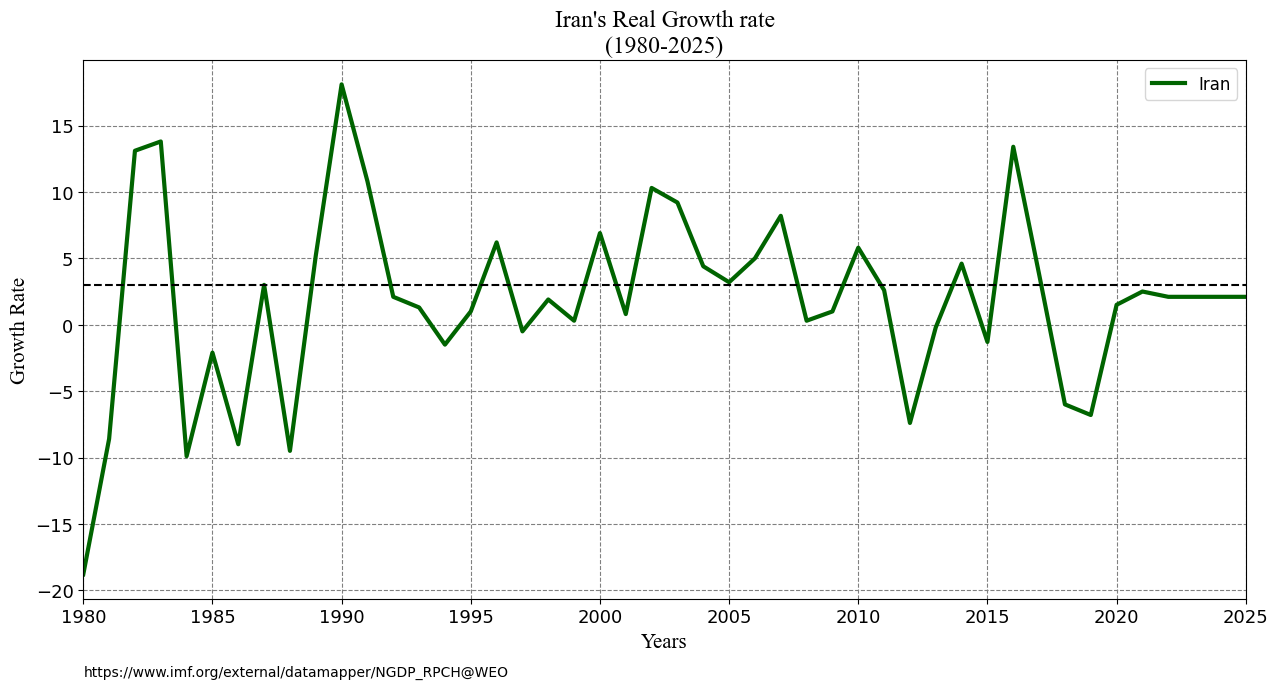

In [160]:
growth.plot(y = 'Iran', kind='line', figsize = (15,7), fontsize = 13, lw = 3, c = 'darkgreen')

plt.grid(ls = '--', c = 'gray')
plt.xlabel('Years', fontsize = 15, fontname = 'Times New Roman')
plt.ylabel('Growth Rate', fontsize = 15, fontname = 'Times New Roman')
plt.title("Iran's Real Growth rate\n(1980-2025)", fontsize = 17, fontname = 'Times New Roman')

plt.figtext(0.125,0, 'https://www.imf.org/external/datamapper/NGDP_RPCH@WEO')

plt.legend(loc='best', fontsize ='large')

plt.xlim(1980,2025)
plt.axhline(3, c = 'k', ls = '--')

#plt.savefig('Iran GDP growth 1 imf.jpg', dpi = 500)
plt.show()

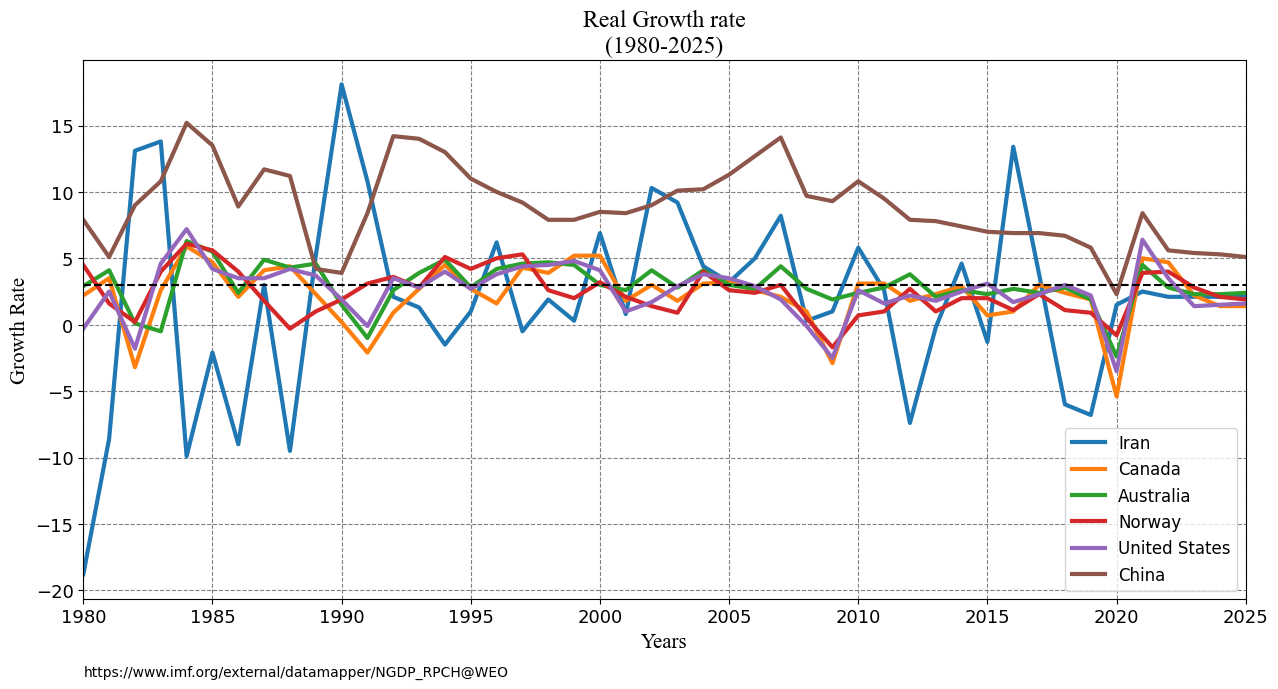

In [164]:
growth.plot(y = ['Iran', 'Canada', 'Australia', 'Norway', 'United States', 'China'], 
            kind='line', figsize = (15,7), fontsize = 13, lw = 3)

plt.grid(ls = '--', c = 'gray')
plt.xlabel('Years', fontsize = 15, fontname = 'Times New Roman')
plt.ylabel('Growth Rate', fontsize = 15, fontname = 'Times New Roman')
plt.title("Real Growth rate\n(1980-2025)", fontsize = 17, fontname = 'Times New Roman')

plt.figtext(0.125,0, 'https://www.imf.org/external/datamapper/NGDP_RPCH@WEO')

plt.legend(loc='best', fontsize ='large')

plt.xlim(1980,2025)
plt.axhline(3, c = 'k', ls = '--')

#plt.savefig('Iran GDP growth 1 imf.jpg', dpi = 500)
plt.show()

In [165]:
growth.head()

,Australia,Canada,China,Iran,Norway,Russian,United States
year,,,,,,,
1980,2.9,2.2,7.9,-18.8,4.5,NaN,-0.3
1981,4.1,3.5,5.1,-8.6,1.6,NaN,2.5
1982,0.1,-3.2,9.0,13.1,0.2,NaN,-1.8
1983,-0.5,2.6,10.8,13.8,4.0,NaN,4.6
1984,6.3,5.9,15.2,-9.9,6.1,NaN,7.2


In [166]:
growth[growth.Iran < 0]

,Australia,Canada,China,Iran,Norway,Russian,United States
year,,,,,,,
1980,2.9,2.2,7.9,-18.8,4.5,NaN,-0.3
1981,4.1,3.5,5.1,-8.6,1.6,NaN,2.5
1984,6.3,5.9,15.2,-9.9,6.1,NaN,7.2
1985,5.5,4.7,13.5,-2.1,5.6,NaN,4.2
1986,2.4,2.1,8.9,-9.0,4.0,NaN,3.5
1988,4.3,4.4,11.2,-9.5,-0.3,NaN,4.2
1994,4.9,4.5,13.0,-1.5,5.1,-12.7,4.0
1997,4.6,4.3,9.2,-0.5,5.3,1.4,4.4
2012,3.8,1.8,7.9,-7.4,2.7,4.0,2.2


In [168]:
growth['Iran'][growth.Iran < 0]

year
1980   -18.8
1981    -8.6
1984    -9.9
1985    -2.1
1986    -9.0
1988    -9.5
1994    -1.5
1997    -0.5
2012    -7.4
2013    -0.2
2015    -1.3
2018    -6.0
2019    -6.8
Name: Iran, dtype: float64

In [169]:
growth.describe()

,Australia,Canada,China,Iran,Norway,Russian,United States
count,47.000000,47.000000,47.000000,47.000000,47.000000,36.000000,47.000000
mean,2.953191,2.263830,8.808511,1.897872,2.402128,1.155556,2.517021
std,1.630931,2.214618,3.003753,6.935432,1.700702,5.816796,2.013684
min,-2.400000,-5.400000,2.300000,-18.800000,-1.700000,-14.500000,-3.500000
25%,2.400000,1.550000,6.900000,-0.350000,1.100000,-2.275000,1.650000
50%,2.800000,2.400000,8.500000,2.100000,2.100000,1.900000,2.700000
75%,4.150000,3.350000,10.800000,5.100000,3.750000,5.100000,3.750000
max,6.300000,5.900000,15.200000,18.100000,6.100000,10.000000,7.200000


In [170]:
growth.max()

Australia         6.3
Canada            5.9
China            15.2
Iran             18.1
Norway            6.1
Russian          10.0
United States     7.2
dtype: float64

In [171]:
growth.min()

Australia        -2.4
Canada           -5.4
China             2.3
Iran            -18.8
Norway           -1.7
Russian         -14.5
United States    -3.5
dtype: float64

In [172]:
growth.mean()

Australia        2.953191
Canada           2.263830
China            8.808511
Iran             1.897872
Norway           2.402128
Russian          1.155556
United States    2.517021
dtype: float64

In [174]:
growth.Iran.mean()

np.float64(1.8978723404255313)

In [175]:
growth['Iran'].mean()

np.float64(1.8978723404255313)

In [176]:
growth_2024 = pd.read_excel('Real GDP Growth (IMF).xlsx', sheet_name=1)
growth_2024.head()

,Country,2024
0,Afghanistan,-5.0
1,Albania,-3.5
2,Algeria,-6.0
3,Angola,-4.0
4,Antigua and Barbuda,-17.3


In [177]:
growth_2024.shape

(194, 2)

In [178]:
growth_2024.columns

Index(['Country', 2024], dtype='object')

In [179]:
growth_2024.index

RangeIndex(start=0, stop=194, step=1)

In [181]:
largest = growth_2024.nlargest(15, 2024)
largest

,Country,2024
70,Guyana,43.4
56,Ethiopia,6.1
68,Guinea,5.2
169,Tajikistan,4.5
13,Bangladesh,3.8
50,Egypt,3.6
118,Myanmar,3.2
168,Taiwan Province of China,3.1
189,Vietnam,2.9
80,Ireland,2.5


In [182]:
smallest = growth_2024.nsmallest(15, 2024)
smallest

,Country,2024
98,Libya,-59.7
101,Macao SAR,-56.3
105,Maldives,-32.2
188,Venezuela,-30.0
7,Aruba,-25.5
95,Lebanon,-25.0
57,Fiji,-19.0
145,Saint Lucia,-18.9
144,Saint Kitts and Nevis,-18.7
132,Panama,-17.9


In [196]:
largest.iloc[0,0]

'Guyana'

In [202]:
largest.iloc[0,1]

np.float64(43.4)

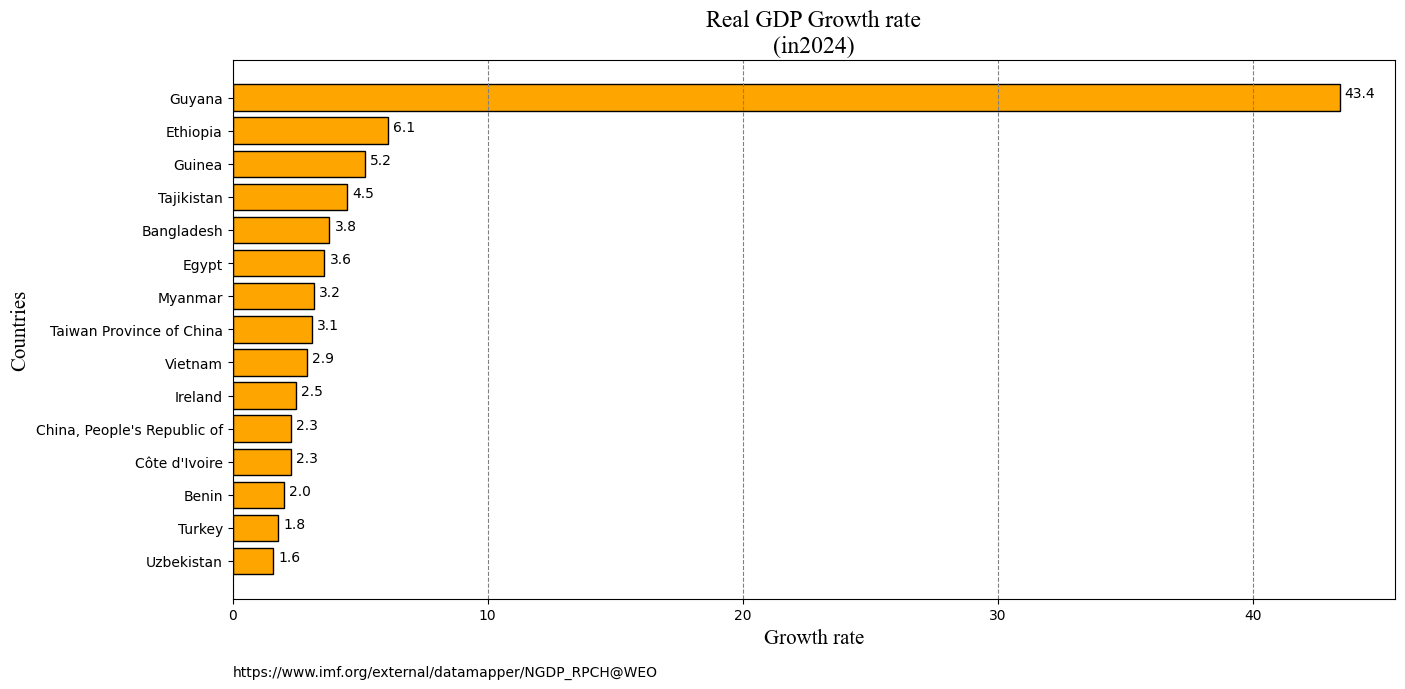

In [200]:
plt.figure(figsize=(15,7))
plt.barh(largest.Country, largest[2024],
       color = 'orange', 
       edgecolor = 'k')

plt.gca().invert_yaxis()

plt.grid(ls = '--', c = 'gray', axis = 'x')
plt.xlabel('Growth rate', fontsize = 15, fontname = 'Times New Roman')
plt.ylabel('Countries', fontsize = 15, fontname = 'Times New Roman')
plt.title("Real GDP Growth rate\n(in2024)", fontsize = 17, fontname = 'Times New Roman')

plt.figtext(0.125,0, 'https://www.imf.org/external/datamapper/NGDP_RPCH@WEO')


#plt.text(largest.iloc[0,1] + 0.2, largest.iloc[0,0], largest.iloc[0,1])

for i in range(0,15):
    plt.text(largest.iloc[i,1] + 0.2, largest.iloc[i,0], largest.iloc[i,1])


plt.show()

In [203]:
# Smallest

### 3.3 GDP per capita, current prices (Purchasing power parity; international dollars per capita) (IMF)
<b> Source:  [International Monetary Fund (IMF)](https://www.imf.org/external/datamapper/PPPPC@WEO/OEMDC/ADVEC/WEOWORLD)

## 4. Directory

To use Python programming efficiently, you should learn about file and directory management in Python, i.e. creating a directory, renaming it, listing all directories, and working with them.

If there are a large number of files to handle in our Python program, we can arrange our code within different directories to make things more manageable.

A directory or folder is a collection of files and subdirectories. Python has the ``os`` module that provides us with many useful methods to work with directories (and files as well).

In [114]:
import os

### 4.1 Current Directory

We can get the present working directory using the ``getcwd()`` method of the ``os`` module.

This method returns the current working directory in the form of a string.

In [115]:
os.getcwd()

'/Users/saeed/Documents/GitHub/Intro_Py_for_Econ_Workshop_Beheshti_Win25/Lectures'

### 4.2 Change Directory

We can change the current working directory by using the ‍‍‍``chdir()`` method.

The new path that we want to change into must be supplied as a string to this method. We can use both the forward-slash `/` or the backward-slash `\` to separate the path elements.

In [118]:
#os.chdir('/Users/saeed/Documents/GitHub/Python-for-Economics-2021-ATU')
os.chdir('/Users/saeed/Documents/GitHub/Intro_Py_for_Econ_Workshop_Beheshti_Win25/Lectures')

In [119]:
os.getcwd()

'/Users/saeed/Documents/GitHub/Intro_Py_for_Econ_Workshop_Beheshti_Win25/Lectures'

### 4.3 List of Files in Directory

All files and sub-directories inside a directory can be retrieved using the ``listdir()`` method.

This method takes in a path and returns a list of subdirectories and files in that path. If no path is specified, it returns the list of subdirectories and files from the current working directory.

In [120]:
os.listdir()

['5. Matplotlib.ipynb',
 'survey_results_public.csv',
 '1. Introduction to Python (Data Structure).ipynb',
 'Py for Econ-Intro-SBU Workshop 2025.pdf',
 'Real GDP Growth (IMF).xlsx',
 '3. Functions.ipynb',
 '6. Pandas 01.ipynb',
 '2. Control flow (Loops).ipynb',
 '7. Pandas 02.ipynb',
 'Human development index (HDI).xlsx',
 '.ipynb_checkpoints',
 'GDP per capita ppp.xlsx',
 'test_1.png',
 '4. NumPy.ipynb']